# Modern Portfolio Theory

In this notebook, you will practice the concepts learned in the previous of Modern Portfolio Theory. The steps involved are:
1. Import the data
2. Portfolio returns/portfolio standard deviation 
3. Change the stocks
4. Change the values of a and b
5. Efficine frontier
6. Optimal weights

### Import the libraries

In [10]:
# Importing the necessary python modules required in this notebook
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt

### Import the data

In [15]:
# Read CSV to get the prices
stock_prices = pd.read_csv('data/Stock_Prices_2016_To_2017_MPT.csv', index_col=0)
stock_prices.tail()

,CVX,GOOGL,MSFT
Date,,,
22-12-2017,124.98,1068.859985,85.51
26-12-2017,125.98,1065.849976,85.40
27-12-2017,125.55,1060.199951,85.71
28-12-2017,125.58,1055.949951,85.72
29-12-2017,125.19,1053.400024,85.54


### Portfolio returns/portfolio standard deviation 

In [24]:
# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1] - stock_prices.iloc[0])/stock_prices.iloc[0]) + 1)**(252/len(stock_prices)) - 1)

# Calculate the daily returns
daily_returns = stock_prices.pct_change()

# Drop the rows with NaN values
daily_returns.dropna(inplace=True)

# Calculate the standard deviation of the stocks and annualise it by mutliplyinh with sqrt(252)
annual_std_dev =  daily_returns.std()*math.sqrt(252)

Calculate the returns and standard deviation of the portfolio with Microsoft (MSFT) and Google (GOOGL)

In [39]:
# Assume equal weights
a = 0.5
b = 0.5

# Calculate portfolio returns
portfolio_returns = a*annual_returns['MSFT'] + b*annual_returns['GOOGL']

# Calculate the covariance of the stocks and annualise it by multiplying with 252
cov_msft_googl =  np.cov(daily_returns['MSFT'], daily_returns['GOOGL'], bias=True)*252

# Calculate portfolio standard deviation
portfolio_std_dev = math.sqrt((a**2)*(annual_returns['MSFT']**2) + (b**2)*(annual_returns['GOOGL']**2) + 2*a*b*cov_msft_googl[0,1])

In [40]:
print("The (Portfolio returns/ portfolio standard deviation) is: {:.2f}".format(portfolio_returns/portfolio_std_dev))

The (Portfolio returns/ portfolio standard deviation) is: 1.14


### Change the stocks

The first case to improve the ratio is by chossing stocks that have less covariance. Calculate the covariance between CVX and MSFT

In [44]:
# Print the covariance value of MSFT and GOOGL
print("The covariance of MSFT and GOOGL is: {:.4f}".format(cov_msft_googl[0,1]))


#Calculate the covariance of the stocks and annualise it by multiplying with 252
cov_msft_cvx=  np.cov(daily_returns['MSFT'], daily_returns['CVX'], bias=True)*252

# Print the covariance value of MSFT and CVX
print("The covariance of MSFT and CVX is: {:.4f}".format(cov_msft_cvx[0,1]))


The covariance of MSFT and GOOGL is: 0.0229
The covariance of MSFT and CVX is: 0.0094


In the above step, you can see that the covariance value is less than the covariance between GOOGL and MSFT 

Calculate the portfolio returns and portfolio standard deviation of MSFT and CVX. Calculate portfolio returns/portfolio deviation

In [53]:
# Calculate portfolio returns
portfolio_returns = a*annual_returns['MSFT'] + b*annual_returns['CVX']
print("The Portfolio returns are: {:.2f}".format(portfolio_returns*100))

# Calculate portfolio standard deviation
portfolio_std_dev = math.sqrt((a**2)*(annual_returns['MSFT']**2) + (b**2)*(annual_returns['CVX']**2) + 2*a*b*cov_msft_cvx[0,1])
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_msft_cvx, weights)))

print("The Portfolio standard deviation is: {:.2f}".format(portfolio_std_dev*100))

print("Portfolio returns / portfolio standard deviation is: {:.2f}".format(portfolio_returns/portfolio_std_dev ))

The Portfolio returns are: 21.87
The Portfolio standard deviation is: 15.31
Portfolio returns / portfolio standard deviation is: 1.43


You can see that the value of portfolio returns/portfolio standard deviation has increased

### Change the weights

The other way to improve the ratio is by changing the percentage capital allocations of the portfolio with Chevron (CVX) and Microsoft (MSFT)

Let's generate 500 portfolios with different percentage allocations. You will calculate portfolio returns and portfolio standard deviation for all the portfolios and save it into a dataframe. You will save portfolio returns / portfolio standard deviation along with the weights, that is a and b values

In [72]:
# Create an empty dataframe
portfolio = pd.DataFrame()

# Initialize the number of portfolios
num_of_portfolios = 500

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate a and b values randomly by using numpy randon functions
    # The argument '1' ensures the values generated are between 0 and 1
    a = np.random.random(1)[0]
    b = 1 - a
    portfolio.loc[i, 'cvx_weight'] = a
    portfolio.loc[i, 'msft_weight'] = b 
    weights = np.array([a,b])

    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] =  a * annual_returns['CVX'] + b* annual_returns['MSFT']

    portfolio.loc[i, 'std_dev'] = np.sqrt(np.dot(weights.T, np.dot(cov_msft_cvx, weights)))

    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev'] 

### Identify the portfolios with maximum returns / risk and minimum risk

Let's identify the portfolios with maximum returns / standard deviation. We will also identigy the portfolio with minimum standard deviation

In [75]:
# Identify the portfolio with the maximum returns / standard deviation using idmax() function 
max_ret_by_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with minimum standard deviation
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]

### Efficient frontier

We will plot all the 500 portfolios in a graph with portfolio standard deviation on the X-axis and portfolio returns on the Y-axis. 
The curve generated is known as the <b>Efficient Frontier</b>

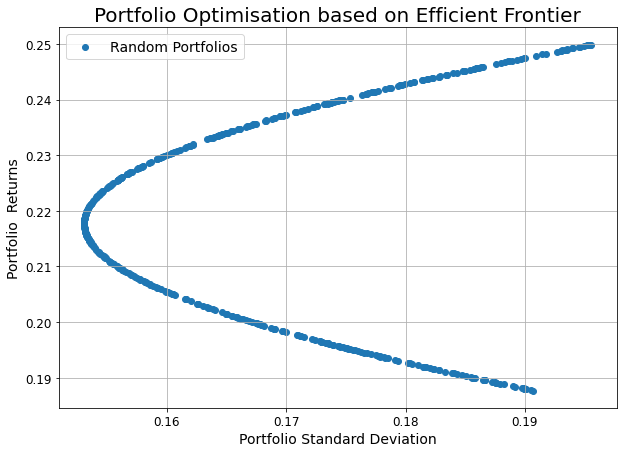

In [79]:
# Plot the portfolio
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio  Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.title("Portfolio Optimisation based on Efficient Frontier", fontsize=20)
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.legend(loc='best', fontsize=14)
plt.show()

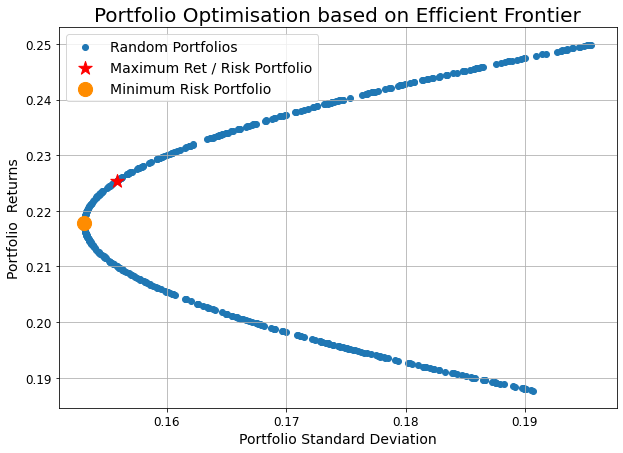

In [84]:
# Highlight the maximum returns / risk portfolio and minimum risk portfolio
# Plot the portfolio
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio  Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.title("Portfolio Optimisation based on Efficient Frontier", fontsize=20)
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_dev.std_dev, max_ret_by_dev.returns, marker='*', color='r', label='Maximum Ret / Risk Portfolio', s=200)
plt.scatter(min_std_dev.std_dev, min_std_dev.returns, marker='o', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.legend(loc='best', fontsize=14)
plt.show()

### Obtain the optimal weights

You have saved the weights whilst creating portfolios. You can know get the optimal weights of the portfolio with maximum returns / standard deviation value.

In [91]:
# Use iloc on the row to obtain the optimal weights
optimal_weights = max_ret_by_dev[["cvx_weight", "msft_weight"]]

# print the optimal weights of CVX and MSFT
print("The optimal weight of MSFT is: {:.2f}%".format(max_ret_by_dev["msft_weight"]*100))
print("The optimal weight of CVX is: {:.2f}%".format(max_ret_by_dev["cvx_weight"]*100))

The optimal weight of MSFT is: 60.74%
The optimal weight of CVX is: 39.26%


In [86]:
optimal_weights

cvx_weight     0.392592
msft_weight    0.607408
Name: 373, dtype: float64